In [44]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%%time
with open('../rnn-experiment-storage/eval_comp/02_28_comp/results.pkl', 'rb') as fp:
    results = pickle.load(fp)

CPU times: user 14.1 s, sys: 11 s, total: 25.1 s
Wall time: 10min 21s


In [25]:
for i, r in enumerate(results):
    if i < 31:
        r['eval_file'] = "datasets/en_en_10mln/valid.txt"
    else:
        r['eval_file'] = "datasets/enron/valid.txt"

In [45]:
for k in results[10]:
    print(k, type(results[10][k]))
    
    if isinstance(results[10][k], list):
        print(len(results[10][k]))

learning_rate <class 'float'>
eval_chunk_size <class 'int'>
eval_file <class 'str'>
num_timesteps <class 'int'>
max_num_chunks <class 'int'>
stats <class 'list'>
50
mode <class 'str'>
hidden_state_histories <class 'list'>
50
model <class 'str'>
lhuc_scalers_history <class 'list'>
0
decay_coef <class 'float'>


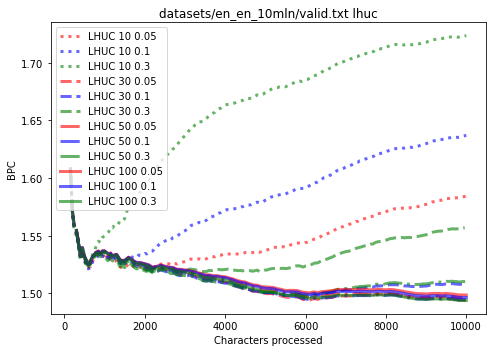

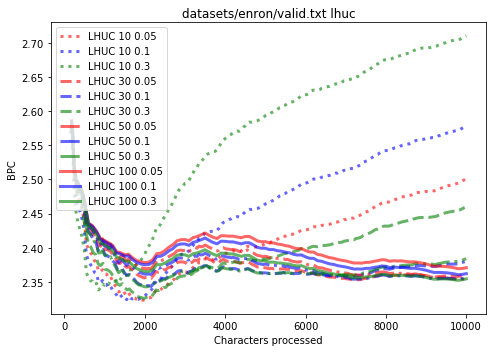

In [106]:
mode = 'X'
color = 'r'
style = '--'
cols = {'dynamic': 'r', 'static': 'b', 'lhuc': 'orange'}
eval_files = set(r['eval_file'] for r in results)
modes = ['lhuc']
lr2col = {0.05: 'r', 0.1: 'b', 0.3: 'g'}
ts2stl = {10: ':', 30: '--', 50: '-.', 100: '-'}

for eval_file in eval_files:
    for mode in modes:
        plt.figure(figsize=(7, 5))
        plt.title('{} {}'.format(eval_file, mode))
        for res in results:
            if not ((res['eval_file'] == eval_file) and (res['mode'] == mode)):
                continue
#             if not res['num_timesteps'] == 50:
#                 continue
#             if not res['learning_rate'] == 0.05:
#                 continue
            sts = res['stats']
            chp = sts[0]['chars_processed']
            moderes = np.stack(x['loss'] for x in sts)

            means = moderes.mean(axis=0)
            stds = moderes.std(axis=0)

            label = res['mode']
            if mode == 'lhuc':
                label = mode.upper() + ' {} {}'.format(res['num_timesteps'], res['learning_rate'])
            if mode == 'dynamic':
                label = mode[0].upper() + mode[1:] + '{} {} {}'.format(res['num_timesteps'],
                                                                      res['learning_rate'],
                                                                     res['decay_coef'])
            n=2
            plt.plot(chp[n:], means[n:], lw=3, label=label, c=lr2col[res['learning_rate']],
                    ls=ts2stl[res['num_timesteps']], alpha=0.6)

            plt.legend()
            plt.xlabel('Characters processed')
            plt.ylabel('BPC');
            plt.grid()
            plt.tight_layout()

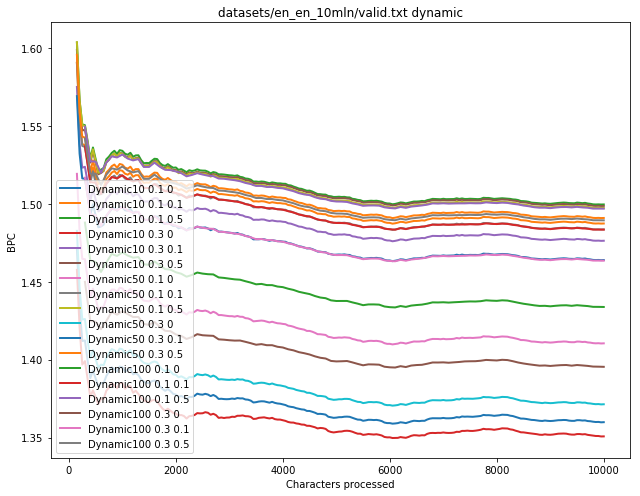

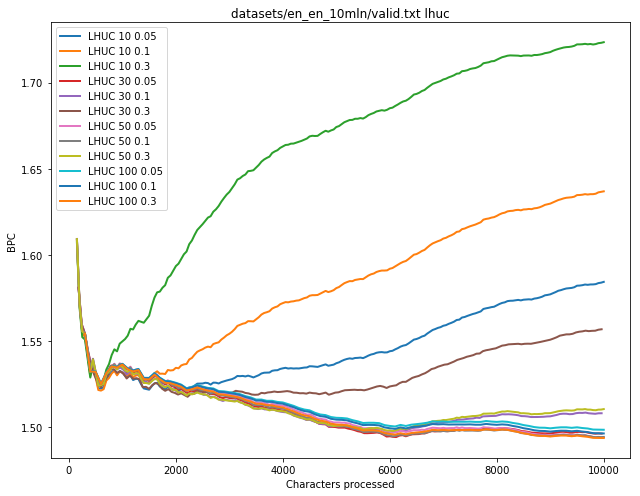

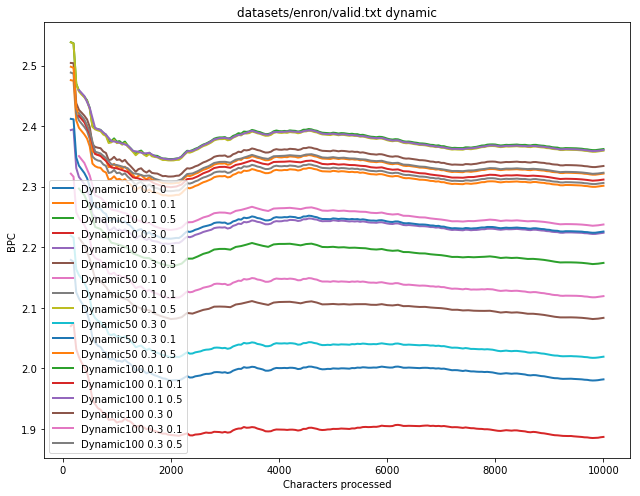

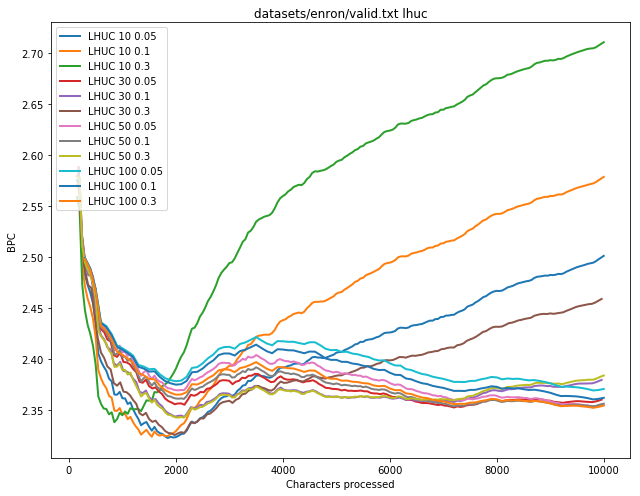

In [93]:
mode = 'X'
color = 'r'
style = '--'
cols = {'dynamic': 'r', 'static': 'b', 'lhuc': 'orange'}
eval_files = set(r['eval_file'] for r in results)
modes = ['dynamic', 'lhuc']
lr2col = {0.05: 'r', 0.1: 'b', 0.3, 'g'}

for eval_file in eval_files:
    for mode in modes:
        plt.figure(figsize=(9, 7))
        plt.title('{} {}'.format(eval_file, mode))
        for res in results:
            if not ((res['eval_file'] == eval_file) and (res['mode'] == mode)):
                continue
            sts = res['stats']
            chp = sts[0]['chars_processed']
            moderes = np.stack(x['loss'] for x in sts)

            means = moderes.mean(axis=0)
            stds = moderes.std(axis=0)

            label = res['mode']
            if mode == 'lhuc':
                label = mode.upper() + ' {} {}'.format(res['num_timesteps'], res['learning_rate'])
            if mode == 'dynamic':
                label = mode[0].upper() + mode[1:] + '{} {} {}'.format(res['num_timesteps'],
                                                                      res['learning_rate'],
                                                                     res['decay_coef'])
            n=2
        #     plt.plot(chp[n:], means[n:], color=color, linestyle=style, label=mode, lw=2)
        #     plt.fill_between(chp[n:], means[n:] - stds[n:], means[n:] + stds[n:], color=color, alpha=0.1)
            plt.plot(chp[n:], means[n:], lw=2, label=label)
    #         plt.fill_between(chp[n:], means[n:] - stds[n:], means[n:] + stds[n:], alpha=0.1, color=cols[res['mode']])

            plt.legend()
            plt.xlabel('Characters processed')
            plt.ylabel('BPC');
            plt.tight_layout()